In [172]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE

In [62]:
pd.set_option('display.max_columns', 40)
sns.set_style('darkgrid')
SEED = 26
np.random.seed(SEED)

In [3]:
data = pd.read_csv('marketing_campaign.csv', delimiter='\t')
print(data.shape)
data.sample(5)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1709,8070,1973,PhD,Married,54222.0,0,1,01-03-2014,98,199,12,31,3,12,7,1,3,3,5,3,0,0,0,0,0,0,3,11,0
1737,5796,1963,Graduation,Married,77437.0,0,0,26-11-2013,70,560,21,442,29,44,29,1,4,5,13,1,0,0,1,0,0,0,3,11,0
923,4988,1948,PhD,Married,34469.0,1,1,04-05-2014,58,19,6,20,0,5,12,3,1,1,4,4,0,0,0,0,0,0,3,11,0
1980,3032,1984,Graduation,Married,24570.0,1,0,27-02-2013,97,28,34,62,11,14,44,3,4,0,4,9,0,0,0,0,0,0,3,11,0
1251,8534,1952,Graduation,Married,67433.0,0,2,16-07-2013,51,615,28,259,12,48,30,4,6,5,13,4,0,1,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
data.dropna(inplace=True)

In [7]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [8]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [9]:
martital_map = {
    'Married': 2,
    'Together': 2,
    'Single': 1,
    'Divorced': 1,
    'Widow': 1,
    'Alone': 1,
    'Absurd': 1,
    'YOLO': 1,
}

In [10]:
education_map = {
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate',
}

In [11]:
data['Age'] = 2021 - data['Year_Birth']
data['Mapped_marital_status'] = data['Marital_Status'].map(martital_map)
data['Education'] = data['Education'].map(education_map)
data['Num_children'] = data['Teenhome'] + data['Kidhome']
data['Fam_size'] = data['Mapped_marital_status'] + data['Num_children']
data['Is_parent'] = (data['Num_children'] > 0).astype(int)

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
NOW = datetime.datetime.strptime('31-12-2021', '%d-%m-%Y')
data['Customer_Age'] = (NOW - data['Dt_Customer']).dt.days / 365

education_encoder = OrdinalEncoder(categories=[['Undergraduate', 'Graduate', 'Postgraduate']],\
                                   handle_unknown='use_encoded_value', unknown_value=-1)
education_encoder.fit(data['Education'].values.reshape(-1, 1))
data['Education'] = education_encoder.transform(data['Education'].values.reshape(-1, 1)).flatten()

mnt_columns = list(filter(lambda x: x.startswith('Mnt'), data.columns))
data['Spent'] = data[mnt_columns].sum(axis=1)/2

purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data['Num_Purchases'] = data[purchase_columns].sum(axis=1)

accepted_columns = list(filter(lambda x: x.startswith('Accepted'), data.columns))
data['Num_Accepted'] = data[accepted_columns].sum(axis=1)

data['Spent/Income'] = (data['Spent'] / data['Income'] * 100).round(2)

In [12]:
added_cols = {'Fam_size', 'Is_parent', 'Spent', 'Num_Purchases', 'Num_Accepted', 'Spent/Income'}
added_linear_cols = added_cols - {'Spent/Income'}

In [13]:
data.drop(['Marital_Status', 'Num_children', 'Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2216 non-null   float64
 1   Income                 2216 non-null   float64
 2   Kidhome                2216 non-null   int64  
 3   Teenhome               2216 non-null   int64  
 4   Recency                2216 non-null   int64  
 5   MntWines               2216 non-null   int64  
 6   MntFruits              2216 non-null   int64  
 7   MntMeatProducts        2216 non-null   int64  
 8   MntFishProducts        2216 non-null   int64  
 9   MntSweetProducts       2216 non-null   int64  
 10  MntGoldProds           2216 non-null   int64  
 11  NumDealsPurchases      2216 non-null   int64  
 12  NumWebPurchases        2216 non-null   int64  
 13  NumCatalogPurchases    2216 non-null   int64  
 14  NumStorePurchases      2216 non-null   int64  
 15  NumWebVis

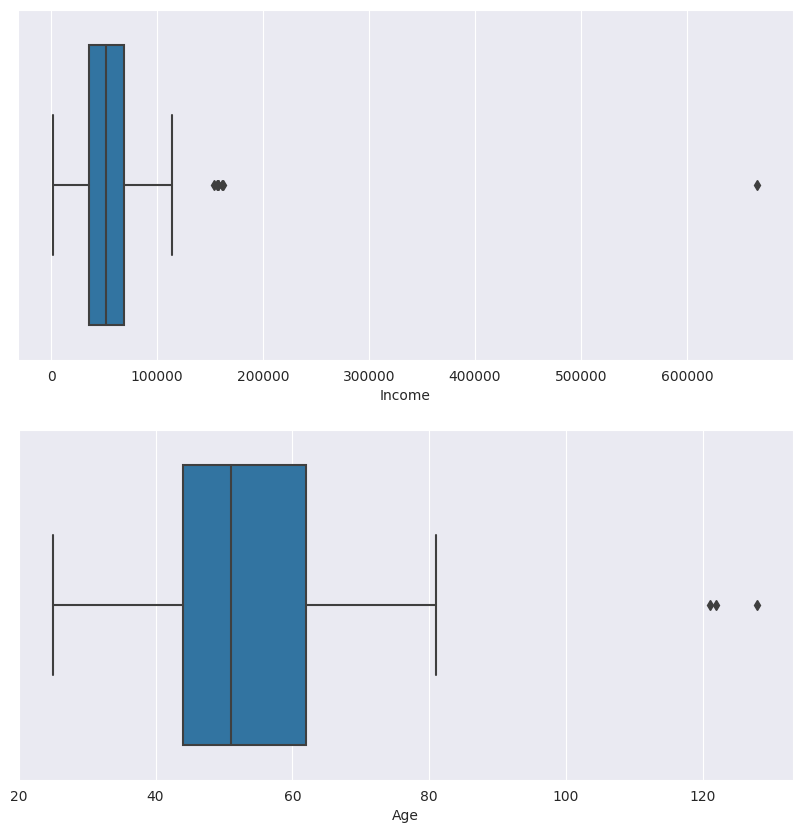

In [15]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.boxplot(data=data, x='Income', ax=axs[0])
sns.boxplot(data=data, x='Age', ax=axs[1])
plt.show()

In [16]:
data = data[data['Income'] < 600000]
data = data[data['Age'] < 100]
data = data.reset_index(drop=True)

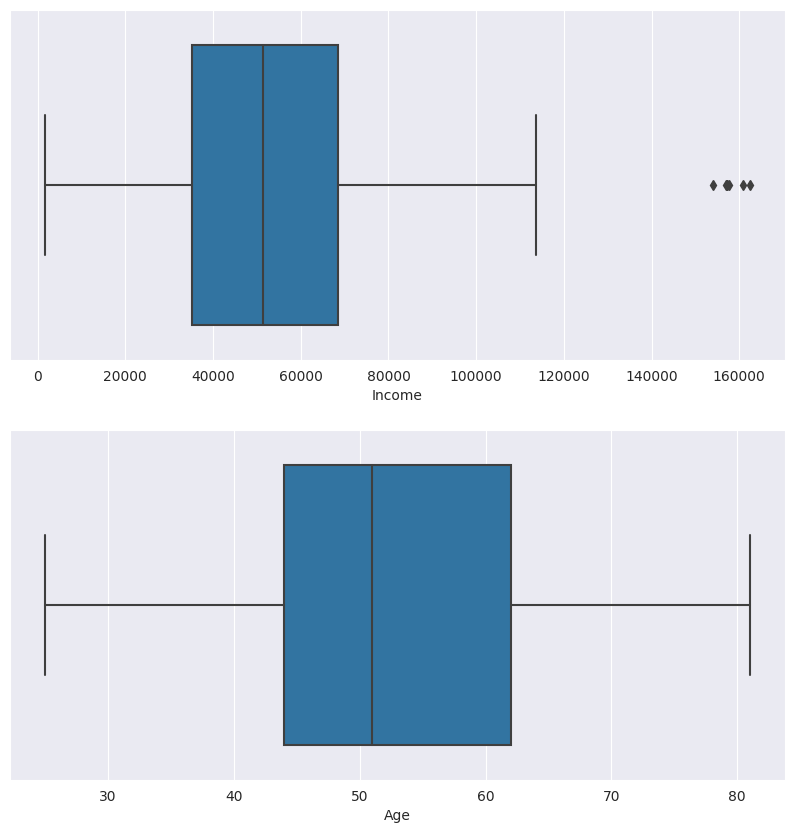

In [17]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.boxplot(data=data, x='Income', ax=axs[0])
sns.boxplot(data=data, x='Age', ax=axs[1])
plt.show()

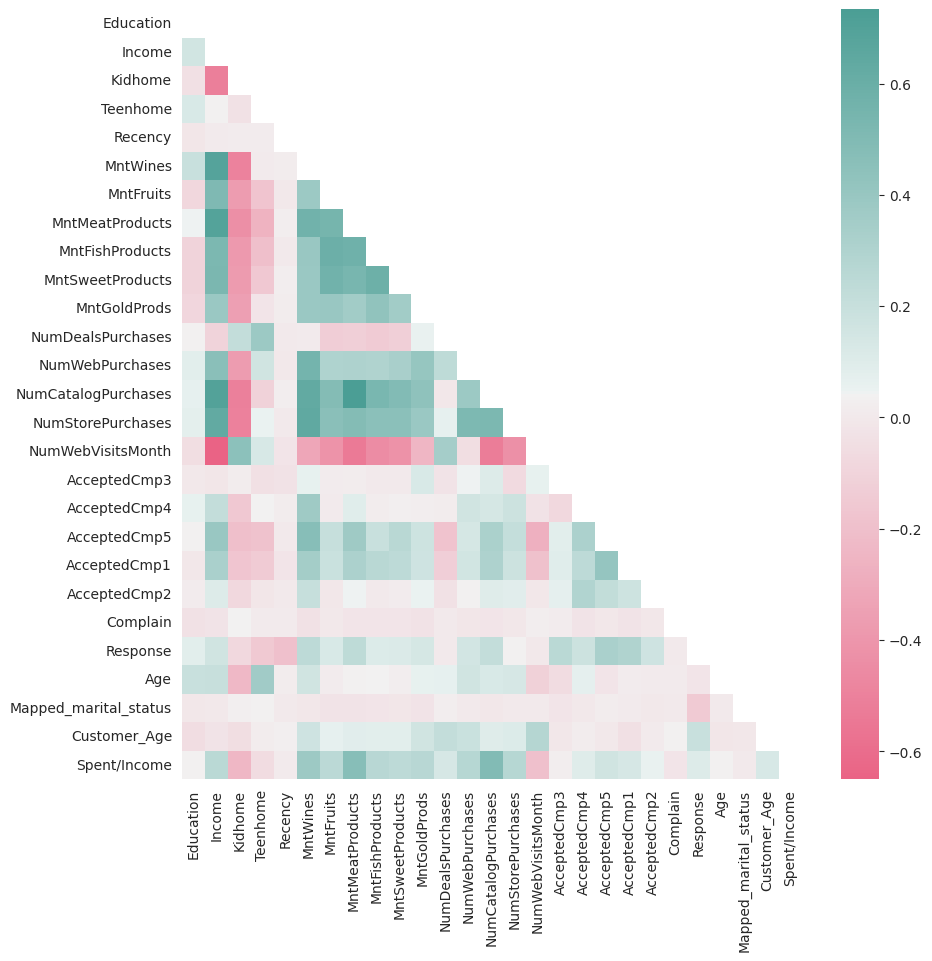

In [18]:
sns.set_style('white')
plt.figure(figsize=(10,10))
plot_corr_data = data.drop(added_linear_cols, axis=1)
sns.heatmap(plot_corr_data.corr(), mask=np.triu(np.ones((plot_corr_data.shape[1], plot_corr_data.shape[1]))),\
            cmap=sns.palettes.diverging_palette(h_neg=0, h_pos=180, l=60, center="light", as_cmap=True))
sns.set_style('darkgrid')
plt.show()

# Dimension Reduction 

In [19]:
pca_data = data.copy()
drop_cols = {'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'}
pca_data = data.drop(drop_cols.union(added_linear_cols), axis=1)
categorical_cols = {'Education', 'Complain', 'Mapped_marital_status'}
numeric_cols = set(pca_data.columns) - categorical_cols

col_trans = ColumnTransformer(
    [
        ('numeric', StandardScaler(), list(numeric_cols)),
        ('category', 'passthrough', list(categorical_cols))
    ]
)

scaled_data = pd.DataFrame(col_trans.fit_transform(pca_data), columns=list(numeric_cols)+list(categorical_cols))

In [20]:
scaled_data

,Customer_Age,NumStorePurchases,NumWebVisitsMonth,NumCatalogPurchases,MntMeatProducts,NumDealsPurchases,Kidhome,Income,MntWines,MntGoldProds,Recency,MntSweetProducts,Teenhome,MntFruits,NumWebPurchases,Spent/Income,Age,MntFishProducts,Education,Complain,Mapped_marital_status
0,1.527721,-0.555814,0.692181,2.503607,1.690293,0.351030,-0.822754,0.287105,0.977660,0.852576,0.310353,1.483713,-0.929699,1.552041,1.426865,1.062873,1.018352,2.453472,1.0,0.0,1.0
1,-1.189011,-1.171160,-0.132545,-0.571340,-0.718230,-0.168701,1.040021,-0.260882,-0.872618,-0.733642,-0.380813,-0.634019,0.908097,-0.637461,-1.126420,-0.554000,1.274785,-0.651004,1.0,0.0,1.0
2,-0.206048,1.290224,-0.544908,-0.229679,-0.178542,-0.688432,-0.822754,0.913196,0.357935,-0.037254,-0.795514,-0.147184,-0.929699,0.570540,1.426865,0.052328,0.334530,1.339513,1.0,0.0,2.0
3,-1.060584,-0.555814,0.279818,-0.913000,-0.655787,-0.168701,1.040021,-1.176114,-0.872618,-0.752987,-0.795514,-0.585335,-0.929699,-0.561961,-0.761665,-0.470778,-1.289547,-0.504911,1.0,0.0,2.0
4,-0.951915,0.059532,-0.132545,0.111982,-0.218684,1.390492,1.040021,0.294307,-0.392257,-0.559545,1.554453,-0.001133,-0.929699,0.419540,0.332600,-0.161670,-1.033114,0.152508,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.134778,-0.555814,-0.132545,0.111982,0.066770,-0.168701,-0.822754,0.430444,1.197084,3.928291,-0.104347,2.213965,0.908097,0.419540,1.791619,0.718099,0.163575,0.079461,1.0,0.0,2.0
2208,-1.653326,-0.248141,0.692181,-0.229679,-0.611184,2.429954,2.902796,0.560123,0.298631,-0.694954,0.241237,-0.658360,0.908097,-0.662628,1.426865,-0.173559,1.958607,-0.687527,2.0,0.0,2.0
2209,-0.981552,2.213242,0.279818,0.111982,0.222878,-0.688432,-0.822754,0.233347,1.787156,-0.385448,1.450778,-0.366260,-0.929699,0.545373,-0.761665,0.706210,-1.033114,-0.103155,1.0,0.0,1.0
2210,-0.976612,1.290224,-0.957271,0.795303,0.209498,-0.168701,-0.822754,0.803172,0.363866,0.330284,-1.417564,0.071892,0.908097,0.092373,0.697355,0.135549,1.103830,0.773403,2.0,0.0,2.0


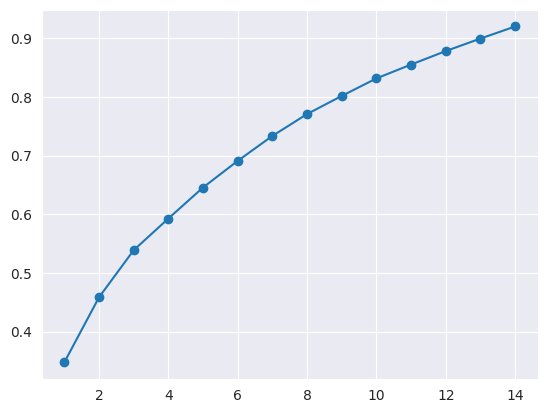

In [21]:
variance_ratios = []
n_range = list(range(1, 15))
for n in n_range:
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    variance_ratios.append(pca.explained_variance_ratio_.sum())

plt.plot(n_range, variance_ratios, marker='o')
plt.show()

In [22]:
pca.explained_variance_

array([6.48569708, 2.07159741, 1.50065883, 1.007846  , 0.98852065,
       0.84799144, 0.79413239, 0.69616625, 0.5770847 , 0.55787985,
       0.44121577, 0.42945877, 0.39796232, 0.38379966])

$\Rightarrow$ According to the Kaiser's rule, we will use PCA with 6 components

In [23]:
N_COMPONENTS = 4
pca = PCA(n_components=N_COMPONENTS)
dim_reduced_data = pca.fit_transform(scaled_data)

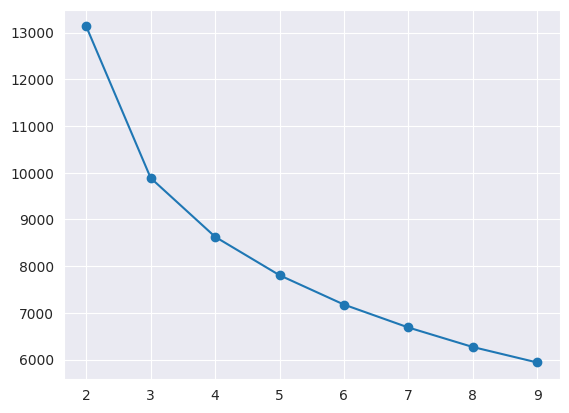

In [24]:
kmeans_scores = []
n_cluster_range = range(2, 10)
for n in n_cluster_range:
    kmeans = KMeans(n, n_init=10)
    kmeans.fit(dim_reduced_data)
    kmeans_scores.append(kmeans.inertia_)

plt.plot(n_cluster_range, kmeans_scores, marker='o')
plt.show()

In [25]:
N_CLUSTERS = 4
agg_cluster = AgglomerativeClustering(N_CLUSTERS,)
agg_cluster.fit(dim_reduced_data)
agg_cluster.labels_

array([1, 3, 1, ..., 1, 1, 0])

In [26]:
scaled_data['cluster'] = agg_cluster.labels_
scaled_data['cluster'] = scaled_data['cluster'].astype('category')

data['cluster'] = agg_cluster.labels_
data['cluster'] = data['cluster'].astype('category')

# Evaluate clustering

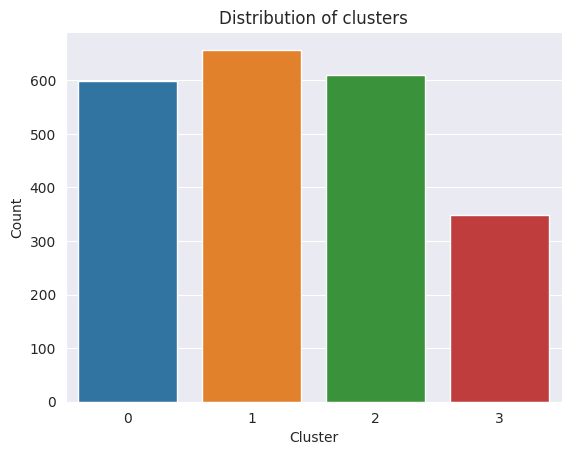

In [27]:
sns.countplot(x = data['cluster'])
plt.title('Distribution of clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## Univariate

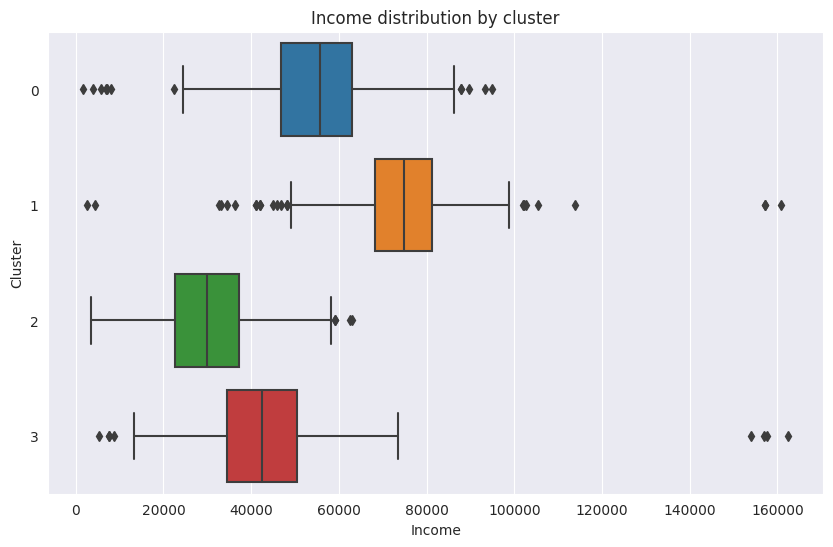

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Income'], y=data['cluster'])
plt.title('Income distribution by cluster')
plt.ylabel('Cluster')
plt.show()

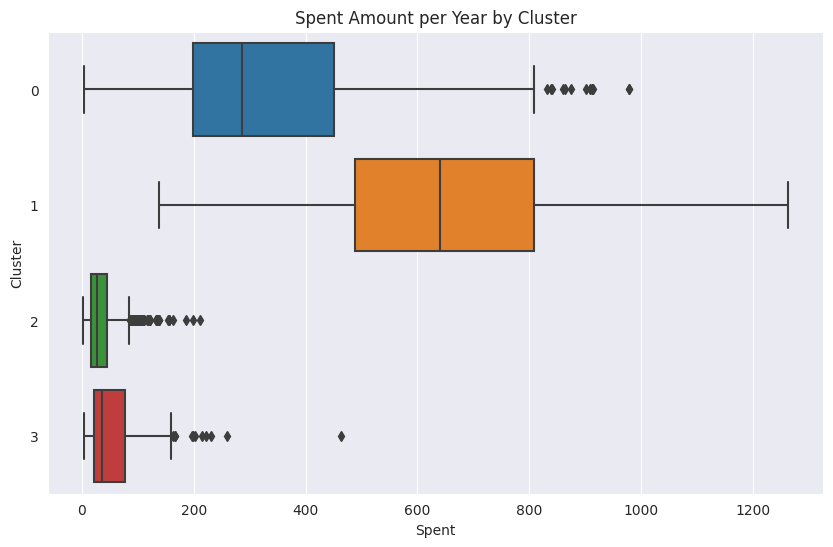

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Spent'], y=data['cluster'])
plt.title('Spent Amount per Year by Cluster')
plt.ylabel('Cluster')
plt.show()

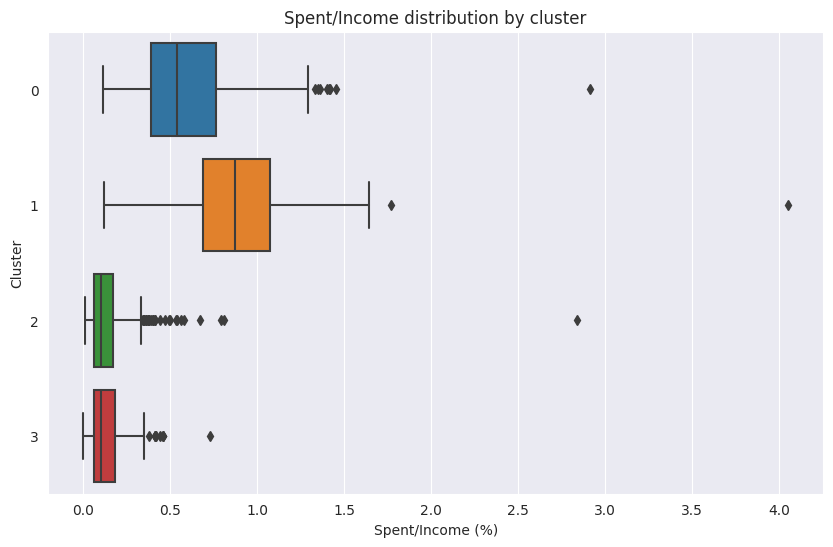

In [30]:
spent_income_data = data[data['Spent/Income']<30]
plt.figure(figsize=(10,6))
sns.boxplot(x=spent_income_data['Spent/Income'], y=spent_income_data['cluster'])
plt.title('Spent/Income distribution by cluster')
plt.xlabel('Spent/Income (%)')
plt.ylabel('Cluster')
plt.show()

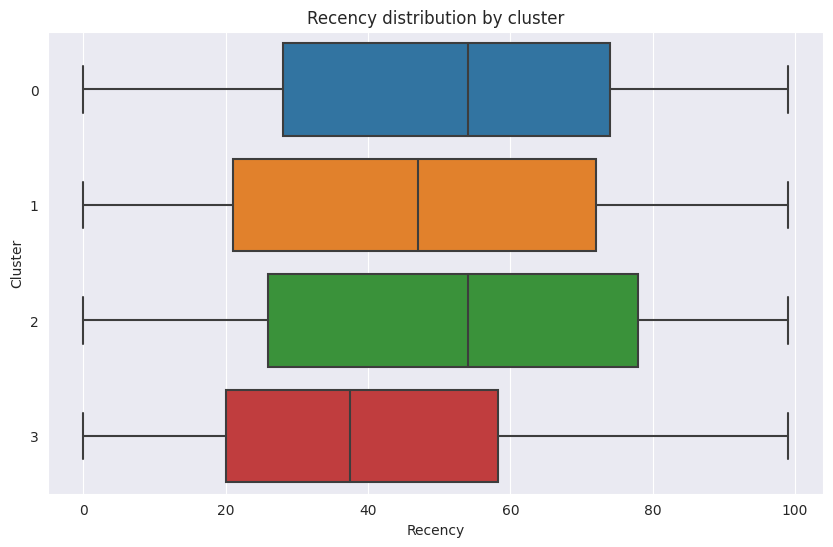

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Recency'], y=spent_income_data['cluster'])
plt.title('Recency distribution by cluster')
plt.xlabel('Recency')
plt.ylabel('Cluster')
plt.show()

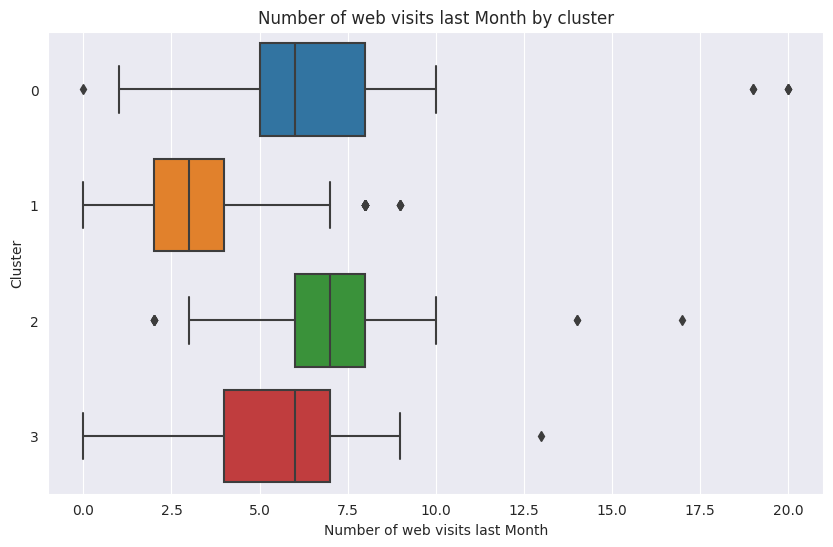

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['NumWebVisitsMonth'], y=spent_income_data['cluster'])
plt.title('Number of web visits last Month by cluster')
plt.xlabel('Number of web visits last Month')
plt.ylabel('Cluster')
plt.show()

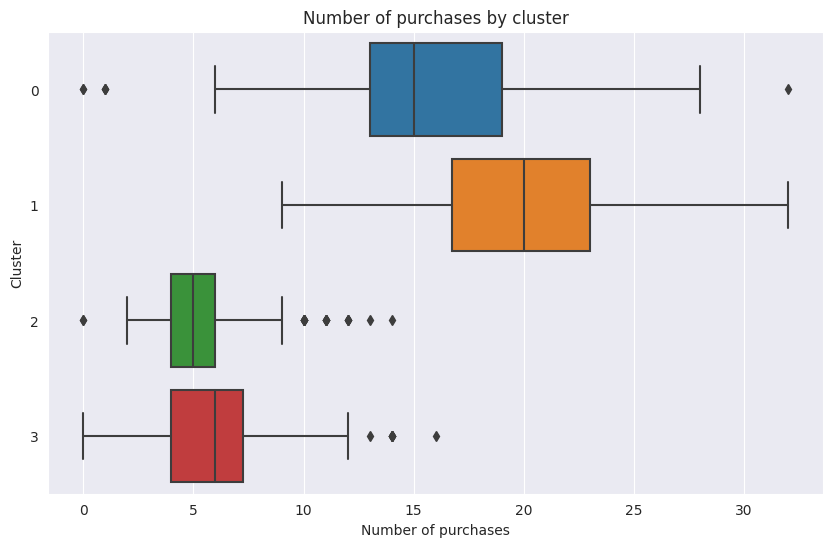

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Num_Purchases'], y=spent_income_data['cluster'])
plt.title('Number of purchases by cluster')
plt.xlabel('Number of purchases')
plt.ylabel('Cluster')
plt.show()

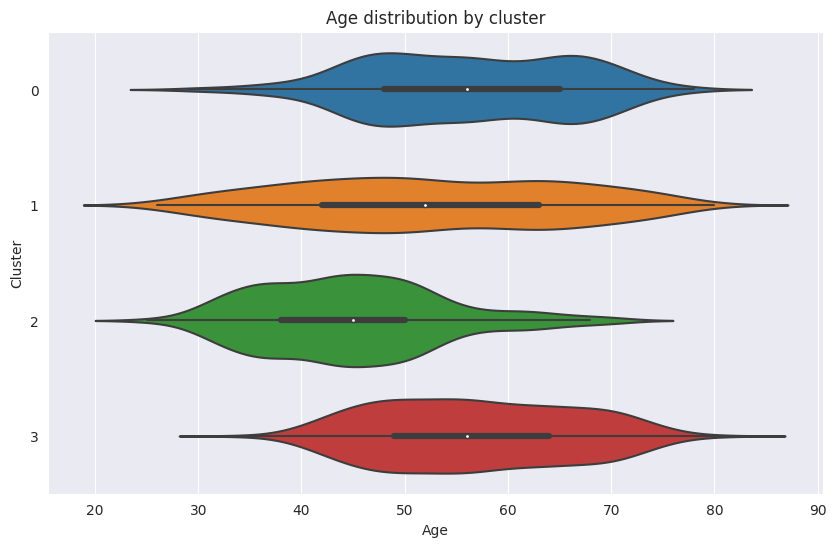

In [34]:
plt.figure(figsize=(10,6))
sns.violinplot(x=data['Age'], y=spent_income_data['cluster'])
plt.title('Age distribution by cluster')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.show()

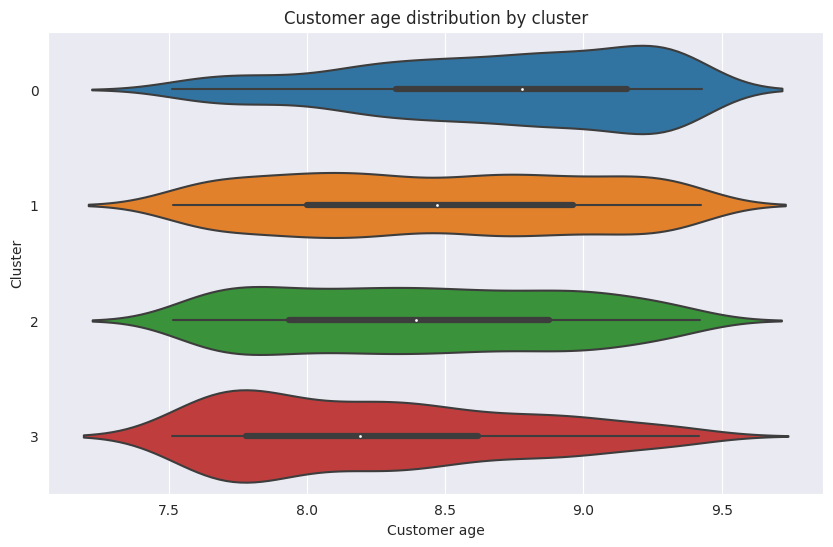

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(x=data['Customer_Age'], y=spent_income_data['cluster'])
plt.title('Customer age distribution by cluster')
plt.xlabel('Customer age')
plt.ylabel('Cluster')
plt.show()

In [36]:
count_data = data.copy()
num_child_type = pd.CategoricalDtype(list(map(str,[0,1,2])),ordered=True)
count_data['Kidhome'] = count_data['Kidhome'].apply(str).astype(num_child_type)
count_data['Teenhome'] = count_data['Teenhome'].apply(str).astype(num_child_type)
fam_size_type = pd.CategoricalDtype(list(map(str,[1,2,3,4,5])),ordered=True)
count_data['Fam_size'] = count_data['Fam_size'].apply(str).astype(fam_size_type)
is_parent_type = pd.CategoricalDtype(list(map(str,[0,1])), ordered=True)
count_data['Is_parent'] = count_data['Is_parent'].apply(str).astype(is_parent_type)
marital_type = pd.CategoricalDtype(list(map(str,[1,2])), ordered=True)
count_data['Mapped_marital_status'] = count_data['Mapped_marital_status'].apply(str).astype(marital_type)
count_data['Education'] = education_encoder.inverse_transform(count_data['Education'].values.reshape(-1,1)).flatten()

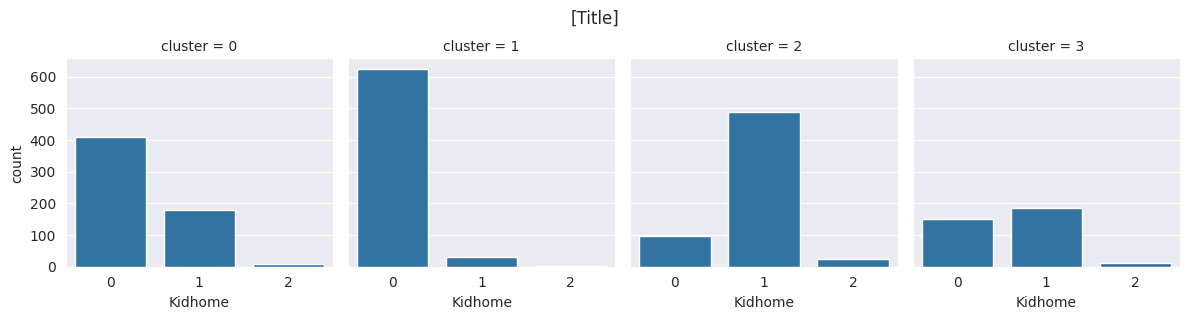

In [37]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Kidhome', order=num_child_type.categories)
g.fig.suptitle('[Title]', y=1.05)
plt.show()

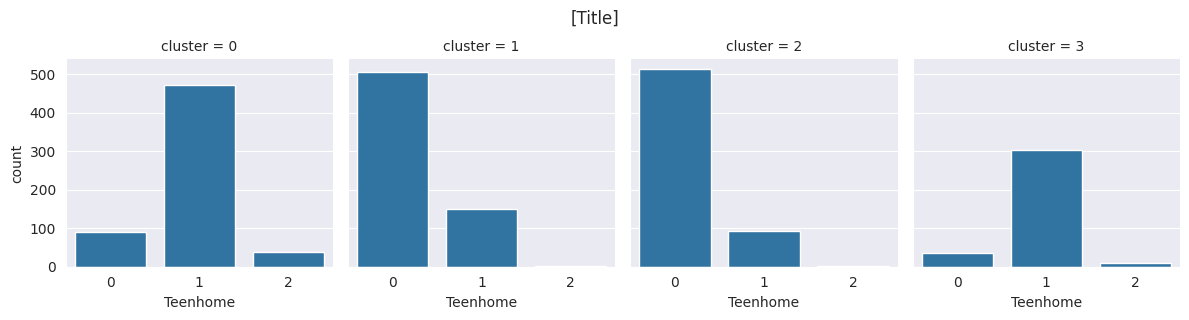

In [38]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Teenhome', order=num_child_type.categories)
g.fig.suptitle('[Title]', y=1.05)
plt.show()

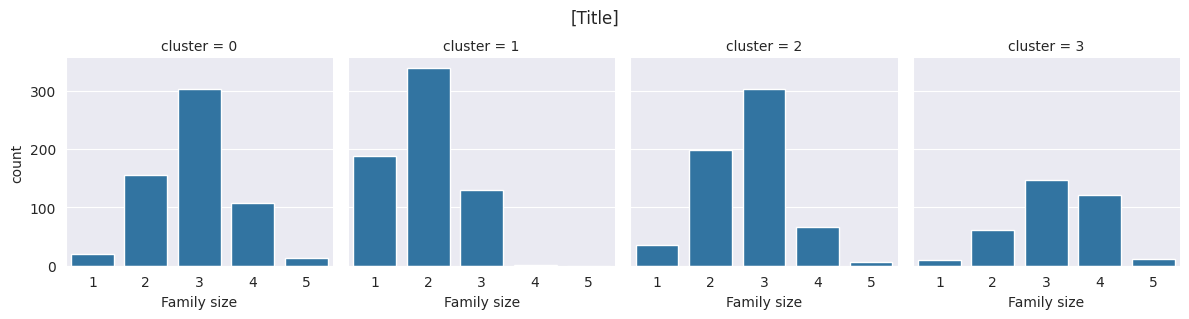

In [39]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Fam_size', order=fam_size_type.categories)
g.fig.suptitle('[Title]', y=1.05)
g.set_xlabels('Family size')
plt.show()

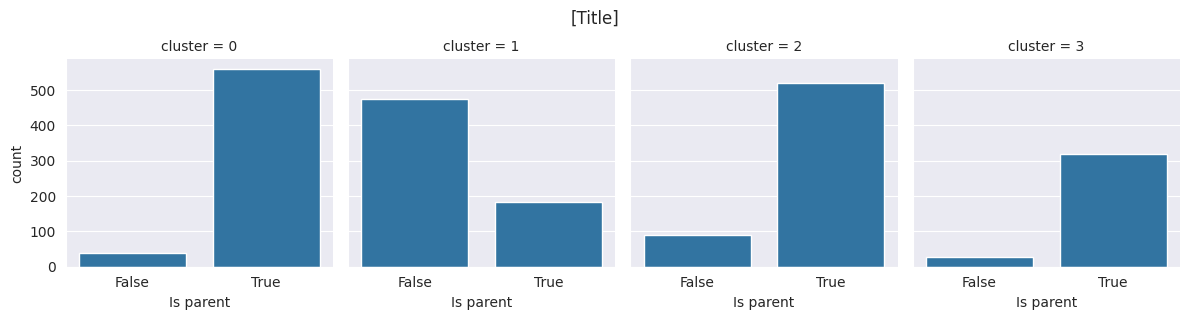

In [40]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Is_parent', order=is_parent_type.categories)
g.fig.suptitle('[Title]', y=1.05)
g.set_xlabels('Is parent')
g.set_xticklabels(['False', 'True'], [0,1])
plt.show()

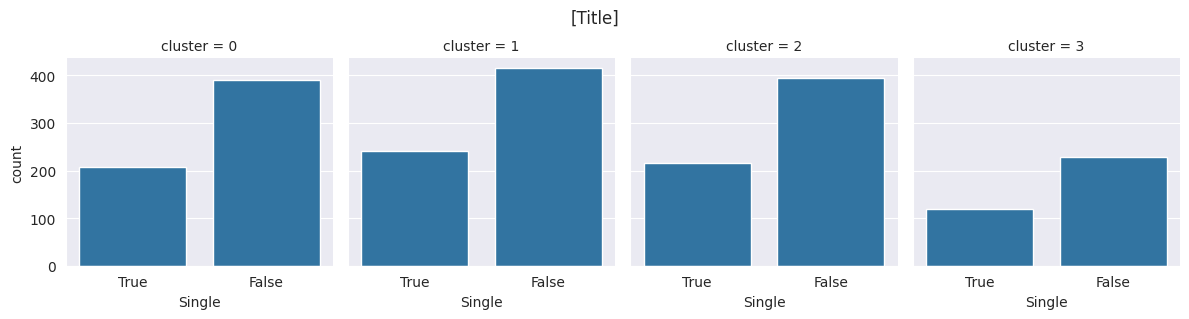

In [41]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Mapped_marital_status', order=marital_type.categories)
g.fig.suptitle('[Title]', y=1.05)
g.set_xlabels('Single')
g.set_xticklabels(['True', 'False'], [1,2])
plt.show()

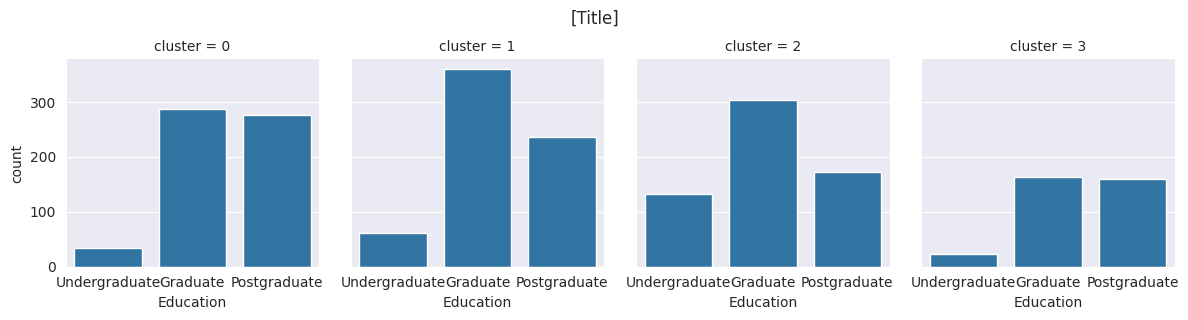

In [42]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.countplot, 'Education', order=['Undergraduate', 'Graduate', 'Postgraduate'])
g.fig.suptitle('[Title]', y=1.05)
plt.show()

## Bivariate

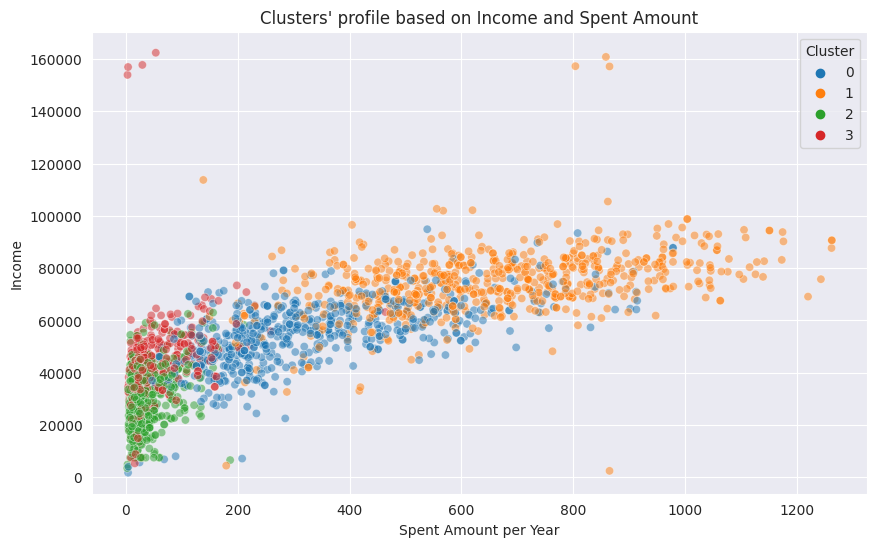

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Spent'], y=data['Income'], hue=data['cluster'], alpha=0.5)
plt.title("Clusters' profile based on Income and Spent Amount")
plt.xlabel('Spent Amount per Year')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

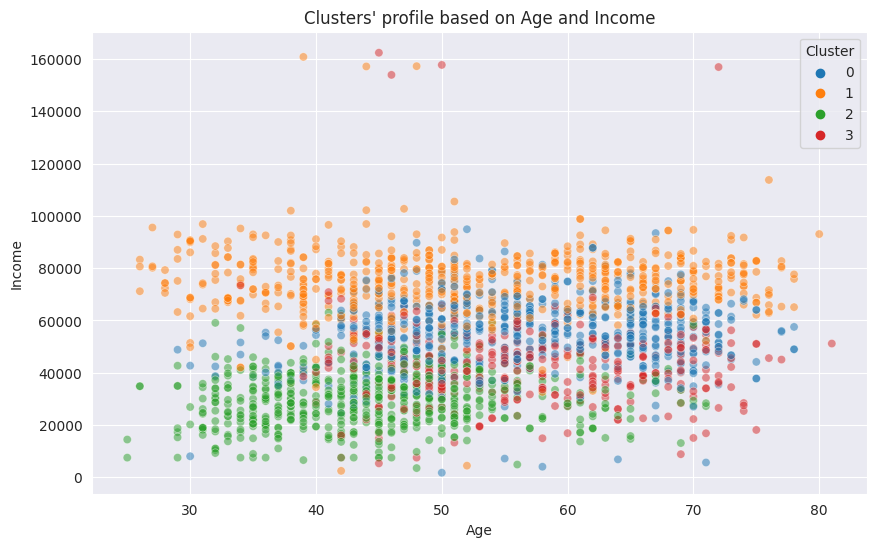

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['cluster'], alpha=0.5)
plt.title("Clusters' profile based on Age and Income")
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

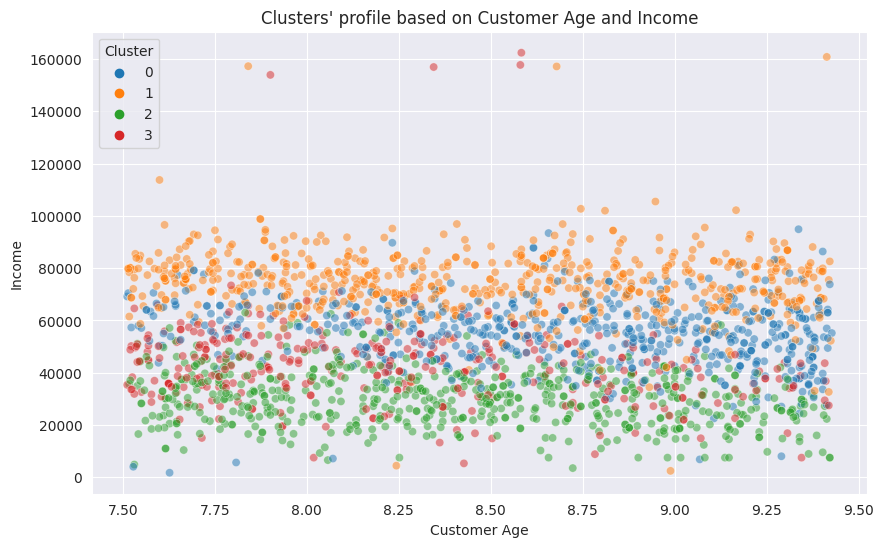

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Customer_Age'], y=data['Income'], hue=data['cluster'], alpha=0.5)
plt.title("Clusters' profile based on Customer Age and Income")
plt.xlabel('Customer Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

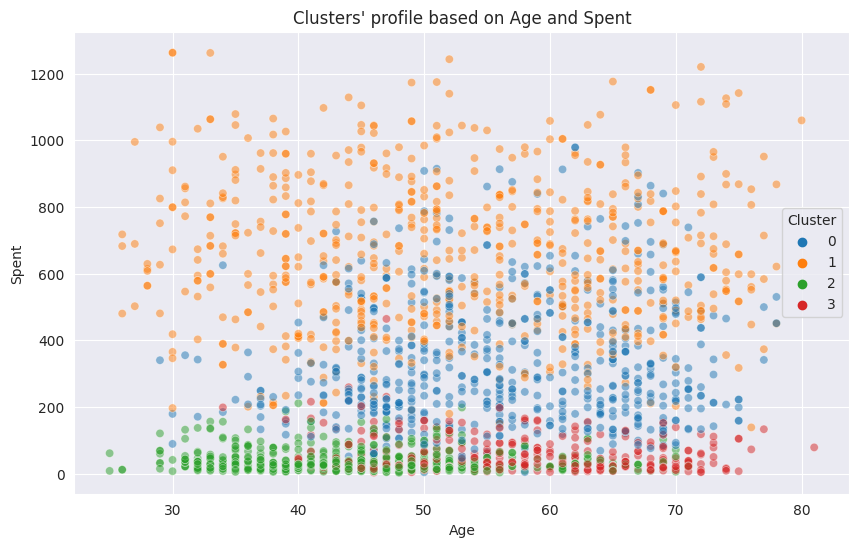

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Age'], y=data['Spent'], hue=data['cluster'], alpha=0.5)
plt.title("Clusters' profile based on Age and Spent")
plt.xlabel('Age')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

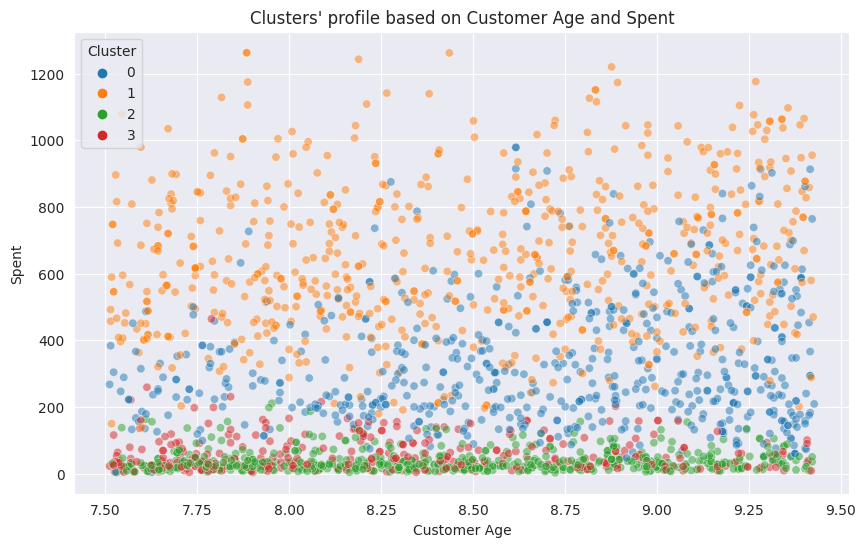

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Customer_Age'], y=data['Spent'], hue=data['cluster'], alpha=0.5)
plt.title("Clusters' profile based on Customer Age and Spent")
plt.xlabel('Customer Age')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

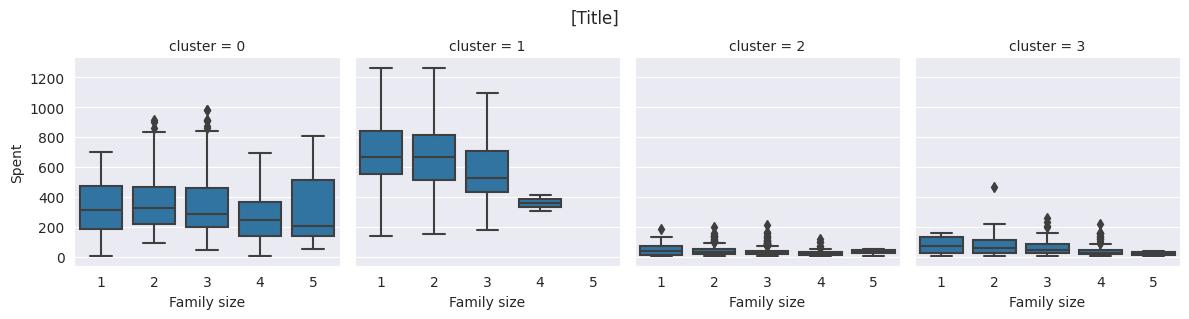

In [48]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Fam_size', 'Spent', order=fam_size_type.categories)
g.set_xlabels('Family size')
g.fig.suptitle('[Title]', y=1.05)
plt.show()

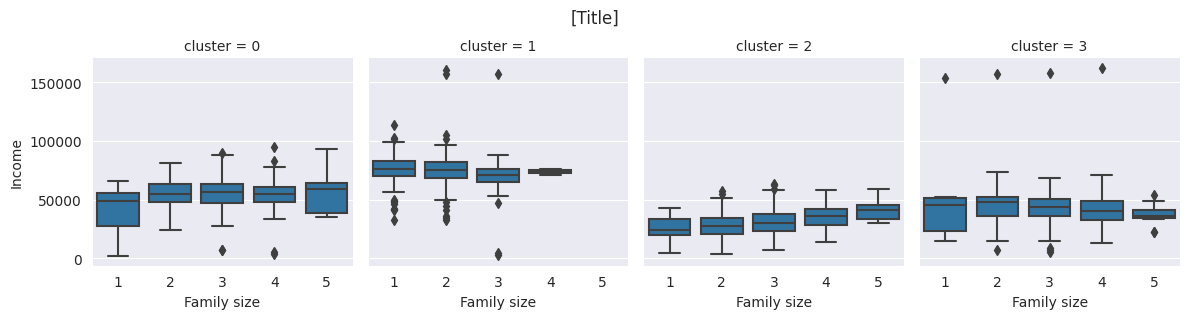

In [49]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Fam_size', 'Income', order=fam_size_type.categories)
g.set_xlabels('Family size')
g.fig.suptitle('[Title]', y=1.05)
plt.show()

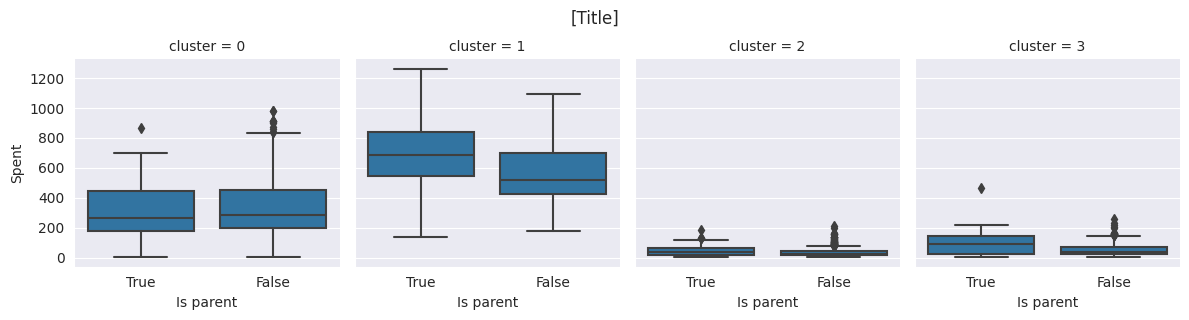

In [50]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Is_parent', 'Spent', order=is_parent_type.categories)
g.set_xlabels('Is parent')
g.set_xticklabels(['True','False'],[0,1])
g.fig.suptitle('[Title]', y=1.05)
plt.show()

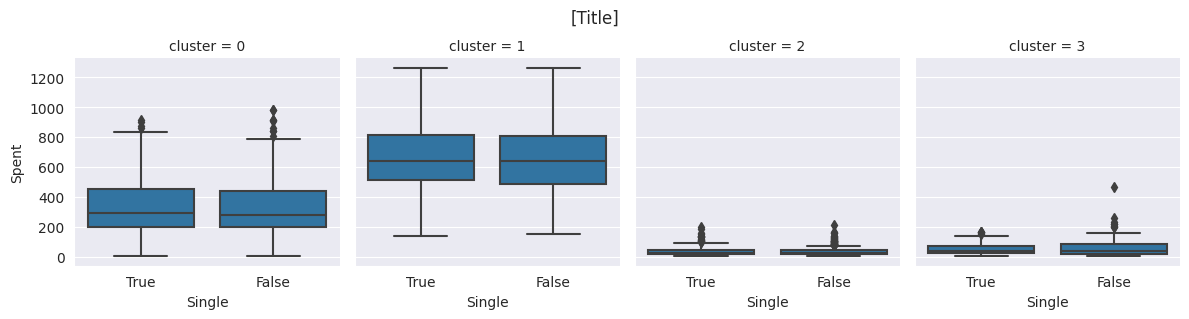

In [51]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Mapped_marital_status', 'Spent', order=marital_type.categories)
g.set_xlabels('Single')
g.set_xticklabels(['True','False'],[1,2])
g.fig.suptitle('[Title]', y=1.05)
plt.show()

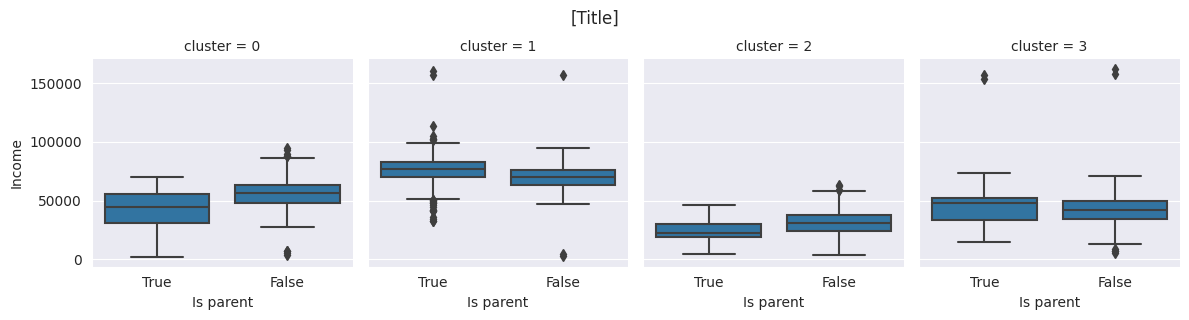

In [52]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Is_parent', 'Income', order=is_parent_type.categories)
g.set_xlabels('Is parent')
g.set_xticklabels(['True','False'],[0,1])
g.fig.suptitle('[Title]', y=1.05)
plt.show()

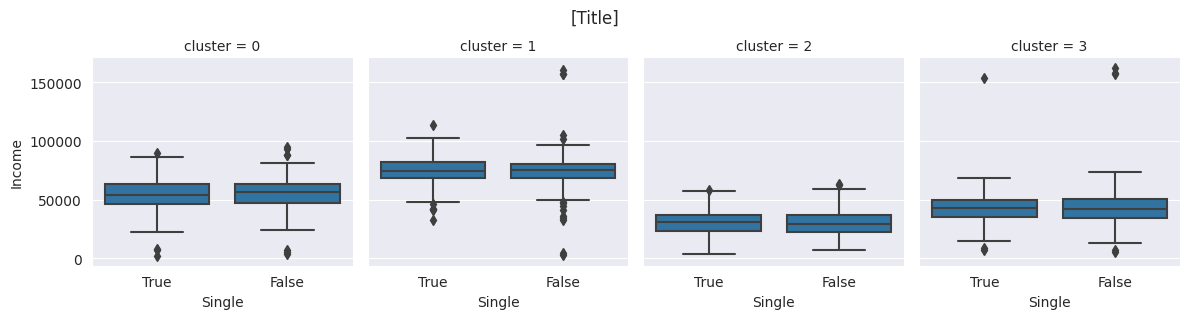

In [53]:
g = sns.FacetGrid(data=count_data, col='cluster')
g.map(sns.boxplot, 'Mapped_marital_status', 'Income', order=marital_type.categories)
g.set_xlabels('Single')
g.set_xticklabels(['True','False'],[1,2])
g.fig.suptitle('[Title]', y=1.05)
plt.show()

**Cluster 1:**
- Avg Income \\$55K
- Spent ~\\$350 a month
- Visit website ~6 times per month
- Evenly distributed from 40-70
- Have been customer longer than the other 3
- 60% of the customers don't have kid
- Mainly have 1 teen child
- 65% of the customers are married
- About half of the customers have the graduate degree and the other half has postgraduate degrees
- Spend more if the customer married

**Cluster 2:**
- Avg Income \$75K
- Spent ~\\$650 a month
- Visit website ~3 times per month
- Mainly 40-50 and 60-70
- Most of customers don't have kid
- 30% of the customers have more than 1 teen child
- 60% of the customers are married
- 55% graduate, 10% undergraduate, 35% postgraduate
- Spend more if the customer have children

**Cluster 3:**
- Avg Income \\$30K
- Spent ~\\$40 a month
- Visit website ~7 times per month
- Mainly 30-50 years old
- Most of customers have 1 kid
- 20% of the customers have more than 1 teen child
- 65% of the customers are married
- 50% graduate, 20% undergraduate, 30% postgraduate

**Cluster 4:**
- Avg Income ~\\$40K
- Spent ~\\$50 a month
- Visit website ~6 times per month
- Evenly distributed from 40-70
- About half of the customers have 1 kid
- Mainly have 1 teen child
- 65% of the customers are married
- About half of the customers have the graduate degree and the other half has postgraduate degrees
- Spend more if the customer have children

# Response predicting 

In [92]:
for col in drop_cols:
    scaled_data[col] = data[col]
scaled_data

,Customer_Age,NumStorePurchases,NumWebVisitsMonth,NumCatalogPurchases,MntMeatProducts,NumDealsPurchases,Kidhome,Income,MntWines,MntGoldProds,Recency,MntSweetProducts,Teenhome,MntFruits,NumWebPurchases,Spent/Income,Age,MntFishProducts,Education,Complain,Mapped_marital_status,cluster,AcceptedCmp1,AcceptedCmp5,AcceptedCmp3,AcceptedCmp4,Response,AcceptedCmp2
0,1.527721,-0.555814,0.692181,2.503607,1.690293,0.351030,-0.822754,0.287105,0.977660,0.852576,0.310353,1.483713,-0.929699,1.552041,1.426865,1.062873,1.018352,2.453472,1.0,0.0,1.0,1,0,0,0,0,1,0
1,-1.189011,-1.171160,-0.132545,-0.571340,-0.718230,-0.168701,1.040021,-0.260882,-0.872618,-0.733642,-0.380813,-0.634019,0.908097,-0.637461,-1.126420,-0.554000,1.274785,-0.651004,1.0,0.0,1.0,3,0,0,0,0,0,0
2,-0.206048,1.290224,-0.544908,-0.229679,-0.178542,-0.688432,-0.822754,0.913196,0.357935,-0.037254,-0.795514,-0.147184,-0.929699,0.570540,1.426865,0.052328,0.334530,1.339513,1.0,0.0,2.0,1,0,0,0,0,0,0
3,-1.060584,-0.555814,0.279818,-0.913000,-0.655787,-0.168701,1.040021,-1.176114,-0.872618,-0.752987,-0.795514,-0.585335,-0.929699,-0.561961,-0.761665,-0.470778,-1.289547,-0.504911,1.0,0.0,2.0,2,0,0,0,0,0,0
4,-0.951915,0.059532,-0.132545,0.111982,-0.218684,1.390492,1.040021,0.294307,-0.392257,-0.559545,1.554453,-0.001133,-0.929699,0.419540,0.332600,-0.161670,-1.033114,0.152508,2.0,0.0,2.0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.134778,-0.555814,-0.132545,0.111982,0.066770,-0.168701,-0.822754,0.430444,1.197084,3.928291,-0.104347,2.213965,0.908097,0.419540,1.791619,0.718099,0.163575,0.079461,1.0,0.0,2.0,1,0,0,0,0,0,0
2208,-1.653326,-0.248141,0.692181,-0.229679,-0.611184,2.429954,2.902796,0.560123,0.298631,-0.694954,0.241237,-0.658360,0.908097,-0.662628,1.426865,-0.173559,1.958607,-0.687527,2.0,0.0,2.0,0,1,0,0,0,0,0
2209,-0.981552,2.213242,0.279818,0.111982,0.222878,-0.688432,-0.822754,0.233347,1.787156,-0.385448,1.450778,-0.366260,-0.929699,0.545373,-0.761665,0.706210,-1.033114,-0.103155,1.0,0.0,1.0,1,0,0,0,1,0,0
2210,-0.976612,1.290224,-0.957271,0.795303,0.209498,-0.168701,-0.822754,0.803172,0.363866,0.330284,-1.417564,0.071892,0.908097,0.092373,0.697355,0.135549,1.103830,0.773403,2.0,0.0,2.0,1,0,0,0,0,0,0


In [135]:
scaled_data = pd.get_dummies(scaled_data, columns=['cluster'], drop_first=True, dtype=int)

In [137]:
X_train, X_val_test, y_train, y_val_test = train_test_split(scaled_data.drop('Response', axis=1), scaled_data['Response'], test_size=0.4, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=SEED)

## SMOTE

In [138]:
smote = SMOTE(random_state=SEED)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

### Logistic Regression 

In [141]:
lr_params = {'C': [0.01, 0.1, 1., 2., 3.]}
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
lr_grid.fit(smote_X_train, smote_y_train)
lr_grid.cv_results_

{'mean_fit_time': array([0.00397325, 0.00565338, 0.0167109 , 0.01742649, 0.0189043 ]),
 'std_fit_time': array([0.00027429, 0.00016954, 0.00153151, 0.00143171, 0.00174735]),
 'mean_score_time': array([0.00948224, 0.00670147, 0.00665793, 0.00657077, 0.00657272]),
 'std_score_time': array([3.26081293e-03, 5.50467143e-05, 6.36450973e-05, 8.42501768e-05,
        2.25876911e-05]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0, 2.0, 3.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 2.0}, {'C': 3.0}],
 'split0_test_accuracy': array([0.7196468 , 0.78587196, 0.80353201, 0.79690949, 0.79690949]),
 'split1_test_accuracy': array([0.79249448, 0.86092715, 0.85871965, 0.85430464, 0.85651214]),
 'split2_test_accuracy': array([0.73672566, 0.80309735, 0.8119469 , 0.80752212, 0.80752212]),
 'split3_test_accuracy': array([0.78761062, 0.83628319, 0.84955752, 0.84734513, 0.84734513]),
 'spli

In [173]:
lr_val_preds = lr_grid.best_estimator_.predict(X_val)
lr_val_acc = accuracy_score(y_val, lr_val_preds)
lr_val_recall = recall_score(y_val, lr_val_preds)
lr_val_precision = precision_score(y_val, lr_val_preds)
lr_val_f1 = f1_score(y_val, lr_val_preds)
lr_val_auc = roc_auc_score(y_val, lr_val_preds)
print("Logistic regression's val accuracy:", lr_val_acc)
print("Logistic regression's val recall:", lr_val_recall)
print("Logistic regression's val precision:", lr_val_precision)
print("Logistic regression's val f1:", lr_val_f1)
print("Logistic regression's val auc:", lr_val_auc)

Logistic regression's accuracy: 0.8099547511312217
Logistic regression's recall: 0.7714285714285715
Logistic regression's precision: 0.4426229508196721
Logistic regression's f1: 0.5625
Logistic regression's auc: 0.7943164362519199


### SVC

In [146]:
svc_params = {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 0.5, 1.]}
svc = SVC()
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
svc_grid.fit(smote_X_train, smote_y_train)
svc_grid.cv_results_

{'mean_fit_time': array([0.04444051, 0.05369329, 0.03817415, 0.04163547, 0.0313417 ,
        0.03306823, 0.03148732, 0.03297992]),
 'std_fit_time': array([0.00288578, 0.00160693, 0.00143565, 0.00148619, 0.0009993 ,
        0.00140632, 0.00149224, 0.00146095]),
 'mean_score_time': array([0.02571278, 0.05807886, 0.02301383, 0.04446397, 0.01786895,
        0.03341689, 0.01628304, 0.03154507]),
 'std_score_time': array([0.00078561, 0.00217431, 0.00132878, 0.00073032, 0.00097394,
        0.00160662, 0.00097357, 0.00088   ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 0.5, 0.5, 1.0, 1.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'rbf', 'poly', 'rbf', 'poly', 'rbf', 'poly',
                    'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, '

In [174]:
svc_val_preds = svc_grid.best_estimator_.predict(X_val)
svc_val_acc = accuracy_score(y_val, svc_val_preds)
svc_val_recall = recall_score(y_val, svc_val_preds)
svc_val_precision = precision_score(y_val, svc_val_preds)
svc_val_f1 = f1_score(y_val, svc_val_preds)
svc_val_auc = roc_auc_score(y_val, svc_val_preds)
print("SVC's val accuracy:", svc_val_acc)
print("SVC's val recall:", svc_val_recall)
print("SVC's val precision:", svc_val_precision)
print("SVC's val f1:", svc_val_f1)
print("SVC's val auc:", svc_val_auc)

SVC's accuracy: 0.8257918552036199
SVC's recall: 0.6714285714285714
SVC's precision: 0.46534653465346537
SVC's f1: 0.5497076023391813
SVC's auc: 0.7631336405529954


### KNN 

In [163]:
knn_params = {'n_neighbors': [5,7,9,11], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn = KNeighborsClassifier(weights='distance')
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
knn_grid.fit(smote_X_train, smote_y_train)
knn_grid.cv_results_

{'mean_fit_time': array([0.00259147, 0.00218687, 0.00222263, 0.00270076, 0.00310669,
        0.00246248, 0.00248985, 0.00257859, 0.00150185, 0.00177226,
        0.0015871 , 0.00205655]),
 'std_fit_time': array([3.80971661e-04, 5.09266996e-05, 1.14378972e-04, 7.47872764e-04,
        1.19017994e-03, 1.82265351e-05, 4.23796385e-05, 9.07844103e-05,
        1.32142099e-04, 2.99875401e-04, 1.81650388e-04, 6.16294962e-04]),
 'mean_score_time': array([0.02518826, 0.02641802, 0.02584143, 0.027707  , 0.0227313 ,
        0.0241631 , 0.02539344, 0.02686291, 0.01225314, 0.00991287,
        0.00930543, 0.01020598]),
 'std_score_time': array([0.0019031 , 0.00136104, 0.00054353, 0.00383202, 0.00058223,
        0.00038712, 0.00032059, 0.00163345, 0.00245951, 0.00098731,
        0.00062131, 0.00022401]),
 'param_algorithm': masked_array(data=['ball_tree', 'ball_tree', 'ball_tree', 'ball_tree',
                    'kd_tree', 'kd_tree', 'kd_tree', 'kd_tree', 'brute',
                    'brute', 'brute', 

In [175]:
knn_val_preds = knn_grid.best_estimator_.predict(X_val)
knn_val_acc = accuracy_score(y_val, knn_val_preds)
knn_val_recall = recall_score(y_val, knn_val_preds)
knn_val_precision = precision_score(y_val, knn_val_preds)
knn_val_f1 = f1_score(y_val, knn_val_preds)
knn_val_auc = roc_auc_score(y_val, knn_val_preds)
print("knn's val accuracy:", knn_val_acc)
print("knn's val recall:", knn_val_recall)
print("knn's val precision:", knn_val_precision)
print("knn's val f1:", knn_val_f1)
print("knn's val auc:", knn_val_auc)

knn's accuracy: 0.7828054298642534
knn's recall: 0.7
knn's precision: 0.3951612903225806
knn's f1: 0.5051546391752576
knn's auc: 0.7491935483870967


### XGBoost 

In [168]:
xgb_params = {'n_estimators':[100, 150, 200], 'max_depth':[5, 10, 15], 'colsample_bytree':[.5, .6, .7, .8, .9]}
xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='recall')
xgb_grid.fit(smote_X_train, smote_y_train)
xgb_grid.cv_results_

{'mean_fit_time': array([0.03940382, 0.05404911, 0.06500244, 0.06602287, 0.06921263,
        0.075668  , 0.05122509, 0.06537762, 0.07655115, 0.03610625,
        0.04957519, 0.0626493 , 0.11286488, 0.06854572, 0.08112483,
        0.05804482, 0.06616564, 0.08133497, 0.11382651, 0.07538247,
        0.06458664, 0.05064487, 0.06578689, 0.08151865, 0.06133499,
        0.07758017, 0.08451915, 0.04650502, 0.06135287, 0.07203341,
        0.05453897, 0.072083  , 0.0804626 , 0.06200819, 0.07031665,
        0.08481627, 0.04448118, 0.05635276, 0.06822457, 0.05495033,
        0.07378826, 0.09219136, 0.06017356, 0.07345257, 0.08950748]),
 'std_fit_time': array([0.00857017, 0.00505867, 0.00500725, 0.01643628, 0.00454902,
        0.00473198, 0.00310686, 0.00524417, 0.0046146 , 0.00096908,
        0.00083995, 0.0015685 , 0.12518518, 0.00794038, 0.00810073,
        0.00933381, 0.00473891, 0.00573059, 0.13514807, 0.04651935,
        0.00280571, 0.0024988 , 0.00438675, 0.00679457, 0.01405411,
        0.006

In [176]:
xgb_val_preds = xgb_grid.best_estimator_.predict(X_val)
xgb_val_acc = accuracy_score(y_val, xgb_val_preds)
xgb_val_recall = recall_score(y_val, xgb_val_preds)
xgb_val_precision = precision_score(y_val, xgb_val_preds)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
xgb_val_auc = roc_auc_score(y_val, xgb_val_preds)
print("xgb's val accuracy:", xgb_val_acc)
print("xgb's val recall:", xgb_val_recall)
print("xgb's val precision:", xgb_val_precision)
print("xgb's val f1:", xgb_val_f1)
print("xgb's val auc:", xgb_val_auc)

xgb's accuracy: 0.8778280542986425
xgb's recall: 0.5285714285714286
xgb's precision: 0.6379310344827587
xgb's f1: 0.5781249999999999
xgb's auc: 0.7360599078341014


### Ensemble 

In [177]:
models = [('lr', lr_grid.best_estimator_), ('svc', svc_grid.best_estimator_),
          ('knn', knn_grid.best_estimator_), ('xgb', xgb_grid.best_estimator_)]

ensemble_model = VotingClassifier(estimators=models)
ensemble_model.fit(smote_X_train, smote_y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('svc', SVC()),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   weights='distance')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [178]:
ensemble_val_preds = ensemble_model.predict(X_val)
ensemble_val_acc = accuracy_score(y_val, ensemble_val_preds)
ensemble_val_recall = recall_score(y_val, ensemble_val_preds)
ensemble_val_precision = precision_score(y_val, ensemble_val_preds)
ensemble_val_f1 = f1_score(y_val, ensemble_val_preds)
ensemble_val_auc = roc_auc_score(y_val, ensemble_val_preds)
print("ensemble's val accuracy:", ensemble_val_acc)
print("ensemble's val recall:", ensemble_val_recall)
print("ensemble's val precision:", ensemble_val_precision)
print("ensemble's val f1:", ensemble_val_f1)
print("ensemble's val auc:", ensemble_val_auc)

ensemble's accuracy: 0.8687782805429864
ensemble's recall: 0.6142857142857143
ensemble's precision: 0.581081081081081
ensemble's f1: 0.5972222222222221
ensemble's auc: 0.7654761904761905


## RandomOverSampling

In [179]:
over_sampling = RandomOverSampler(random_state=SEED)
ros_X_train, ros_y_train = over_sampling.fit_resample(X_train, y_train)

### Logistic Regression 

In [180]:
lr_params = {'C': [0.01, 0.1, 1., 2., 3.]}
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
lr_grid.fit(ros_X_train, ros_y_train)
lr_grid.cv_results_

{'mean_fit_time': array([0.00349884, 0.00556068, 0.01024742, 0.01055207, 0.01067271]),
 'std_fit_time': array([0.00025089, 0.00017435, 0.00140076, 0.00134449, 0.00146332]),
 'mean_score_time': array([0.00837307, 0.00656714, 0.00647874, 0.00650597, 0.00650821]),
 'std_score_time': array([3.48168943e-03, 1.22377319e-04, 3.12105857e-05, 5.54385489e-05,
        5.50404355e-05]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0, 2.0, 3.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 2.0}, {'C': 3.0}],
 'split0_test_accuracy': array([0.7196468 , 0.8013245 , 0.81677704, 0.81898455, 0.82339956]),
 'split1_test_accuracy': array([0.77924945, 0.8410596 , 0.85209713, 0.85209713, 0.84988962]),
 'split2_test_accuracy': array([0.74336283, 0.83628319, 0.84734513, 0.84513274, 0.84513274]),
 'split3_test_accuracy': array([0.72345133, 0.82522124, 0.83185841, 0.82964602, 0.83185841]),
 'spli

In [181]:
lr_val_preds = lr_grid.best_estimator_.predict(X_val)
lr_val_acc = accuracy_score(y_val, lr_val_preds)
lr_val_recall = recall_score(y_val, lr_val_preds)
lr_val_precision = precision_score(y_val, lr_val_preds)
lr_val_f1 = f1_score(y_val, lr_val_preds)
lr_val_auc = roc_auc_score(y_val, lr_val_preds)
print("Logistic regression's val accuracy:", lr_val_acc)
print("Logistic regression's val recall:", lr_val_recall)
print("Logistic regression's val precision:", lr_val_precision)
print("Logistic regression's val f1:", lr_val_f1)
print("Logistic regression's val auc:", lr_val_auc)

Logistic regression's accuracy: 0.8371040723981901
Logistic regression's recall: 0.8
Logistic regression's precision: 0.49122807017543857
Logistic regression's f1: 0.6086956521739131
Logistic regression's auc: 0.8220430107526883


### SVC

In [182]:
svc_params = {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 0.5, 1.]}
svc = SVC()
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
svc_grid.fit(ros_X_train, ros_y_train)
svc_grid.cv_results_

{'mean_fit_time': array([0.04403386, 0.05435233, 0.03600125, 0.042278  , 0.03367367,
        0.03446031, 0.02978163, 0.03322382]),
 'std_fit_time': array([0.00163532, 0.00039976, 0.00084248, 0.00127463, 0.00080794,
        0.00135997, 0.00080163, 0.00125006]),
 'mean_score_time': array([0.02617183, 0.05700645, 0.02207565, 0.04427891, 0.01907148,
        0.03511629, 0.01666145, 0.03307018]),
 'std_score_time': array([0.00085313, 0.00049246, 0.00154992, 0.00148665, 0.00049557,
        0.00140163, 0.00094305, 0.00186408]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 0.5, 0.5, 1.0, 1.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'rbf', 'poly', 'rbf', 'poly', 'rbf', 'poly',
                    'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, '

In [183]:
svc_val_preds = svc_grid.best_estimator_.predict(X_val)
svc_val_acc = accuracy_score(y_val, svc_val_preds)
svc_val_recall = recall_score(y_val, svc_val_preds)
svc_val_precision = precision_score(y_val, svc_val_preds)
svc_val_f1 = f1_score(y_val, svc_val_preds)
svc_val_auc = roc_auc_score(y_val, svc_val_preds)
print("SVC's val accuracy:", svc_val_acc)
print("SVC's val recall:", svc_val_recall)
print("SVC's val precision:", svc_val_precision)
print("SVC's val f1:", svc_val_f1)
print("SVC's val auc:", svc_val_auc)

SVC's accuracy: 0.8552036199095022
SVC's recall: 0.7428571428571429
SVC's precision: 0.5306122448979592
SVC's f1: 0.6190476190476191
SVC's auc: 0.8096006144393242


### KNN 

In [184]:
knn_params = {'n_neighbors': [5,7,9,11], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn = KNeighborsClassifier(weights='distance')
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='recall')
knn_grid.fit(ros_X_train, ros_y_train)
knn_grid.cv_results_

{'mean_fit_time': array([0.00247736, 0.00218744, 0.00213184, 0.00212417, 0.00251365,
        0.0024848 , 0.00252838, 0.00262613, 0.00156193, 0.00196686,
        0.00164509, 0.00199041]),
 'std_fit_time': array([4.51325310e-04, 7.74236428e-05, 1.55821453e-05, 1.81684344e-05,
        5.27365514e-05, 2.47275815e-05, 4.24362032e-05, 1.56444117e-04,
        1.20838326e-04, 7.89447452e-04, 7.31002406e-05, 2.66564024e-04]),
 'mean_score_time': array([0.02515535, 0.02408524, 0.02507796, 0.02522111, 0.02067957,
        0.02364502, 0.02567439, 0.02714782, 0.01357379, 0.01131911,
        0.00995183, 0.01053815]),
 'std_score_time': array([0.00225078, 0.00031712, 0.00093403, 0.00036935, 0.00038712,
        0.00040239, 0.00068859, 0.0010448 , 0.00656452, 0.00263623,
        0.00060751, 0.00192887]),
 'param_algorithm': masked_array(data=['ball_tree', 'ball_tree', 'ball_tree', 'ball_tree',
                    'kd_tree', 'kd_tree', 'kd_tree', 'kd_tree', 'brute',
                    'brute', 'brute', 

In [185]:
knn_val_preds = knn_grid.best_estimator_.predict(X_val)
knn_val_acc = accuracy_score(y_val, knn_val_preds)
knn_val_recall = recall_score(y_val, knn_val_preds)
knn_val_precision = precision_score(y_val, knn_val_preds)
knn_val_f1 = f1_score(y_val, knn_val_preds)
knn_val_auc = roc_auc_score(y_val, knn_val_preds)
print("knn's val accuracy:", knn_val_acc)
print("knn's val recall:", knn_val_recall)
print("knn's val precision:", knn_val_precision)
print("knn's val f1:", knn_val_f1)
print("knn's val auc:", knn_val_auc)

knn's accuracy: 0.8009049773755657
knn's recall: 0.6142857142857143
knn's precision: 0.41346153846153844
knn's f1: 0.4942528735632184
knn's auc: 0.7251536098310292


### XGBoost 

In [186]:
xgb_params = {'n_estimators':[100, 150, 200], 'max_depth':[5, 10, 15], 'colsample_bytree':[.5, .6, .7, .8, .9]}
xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='recall')
xgb_grid.fit(ros_X_train, ros_y_train)
xgb_grid.cv_results_

{'mean_fit_time': array([0.03850465, 0.04423451, 0.05601892, 0.06600766, 0.08127942,
        0.08562241, 0.05085902, 0.05925884, 0.06997576, 0.0345305 ,
        0.05180621, 0.06515841, 0.04308467, 0.05934854, 0.11070323,
        0.05649662, 0.0630827 , 0.07632604, 0.03283877, 0.06309481,
        0.07062769, 0.0912147 , 0.06012206, 0.08860316, 0.08209848,
        0.07012348, 0.07396793, 0.03340001, 0.04723334, 0.0649158 ,
        0.04565768, 0.06322155, 0.07107186, 0.04761186, 0.06525135,
        0.07479744, 0.03428769, 0.0611589 , 0.08487802, 0.04967723,
        0.06531391, 0.08225994, 0.05056882, 0.07547588, 0.07379203]),
 'std_fit_time': array([0.0134897 , 0.00076899, 0.00063184, 0.01882639, 0.01261704,
        0.01156661, 0.00412709, 0.00224147, 0.00111227, 0.00319594,
        0.00589255, 0.00928532, 0.00053522, 0.00429808, 0.02859019,
        0.01167947, 0.00449623, 0.00662402, 0.00027899, 0.02621446,
        0.00707037, 0.07247887, 0.00299035, 0.01198856, 0.07128083,
        0.003

In [187]:
xgb_val_preds = xgb_grid.best_estimator_.predict(X_val)
xgb_val_acc = accuracy_score(y_val, xgb_val_preds)
xgb_val_recall = recall_score(y_val, xgb_val_preds)
xgb_val_precision = precision_score(y_val, xgb_val_preds)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
xgb_val_auc = roc_auc_score(y_val, xgb_val_preds)
print("xgb's val accuracy:", xgb_val_acc)
print("xgb's val recall:", xgb_val_recall)
print("xgb's val precision:", xgb_val_precision)
print("xgb's val f1:", xgb_val_f1)
print("xgb's val auc:", xgb_val_auc)

xgb's accuracy: 0.8665158371040724
xgb's recall: 0.4714285714285714
xgb's precision: 0.6
xgb's f1: 0.528
xgb's auc: 0.7061443932411675


### Ensemble 

In [188]:
models = [('lr', lr_grid.best_estimator_), ('svc', svc_grid.best_estimator_),
          ('knn', knn_grid.best_estimator_), ('xgb', xgb_grid.best_estimator_)]

ensemble_model = VotingClassifier(estimators=models)
ensemble_model.fit(ros_X_train, ros_y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=3.0, penalty='l1',
                                                 solver='liblinear')),
                             ('svc', SVC()),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   weights='distance')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            e...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [189]:
ensemble_val_preds = ensemble_model.predict(X_val)
ensemble_val_acc = accuracy_score(y_val, ensemble_val_preds)
ensemble_val_recall = recall_score(y_val, ensemble_val_preds)
ensemble_val_precision = precision_score(y_val, ensemble_val_preds)
ensemble_val_f1 = f1_score(y_val, ensemble_val_preds)
ensemble_val_auc = roc_auc_score(y_val, ensemble_val_preds)
print("ensemble's val accuracy:", ensemble_val_acc)
print("ensemble's val recall:", ensemble_val_recall)
print("ensemble's val precision:", ensemble_val_precision)
print("ensemble's val f1:", ensemble_val_f1)
print("ensemble's val auc:", ensemble_val_auc)

ensemble's accuracy: 0.8778280542986425
ensemble's recall: 0.6428571428571429
ensemble's precision: 0.6081081081081081
ensemble's f1: 0.625
ensemble's auc: 0.7824500768049154


In [190]:
ensemble_test_preds = ensemble_model.predict(X_test)
ensemble_test_acc = accuracy_score(y_test, ensemble_test_preds)
ensemble_test_recall = recall_score(y_test, ensemble_test_preds)
ensemble_test_precision = precision_score(y_test, ensemble_test_preds)
ensemble_test_f1 = f1_score(y_test, ensemble_test_preds)
ensemble_test_auc = roc_auc_score(y_test, ensemble_test_preds)
print("ensemble's test accuracy:", ensemble_test_acc)
print("ensemble's test recall:", ensemble_test_recall)
print("ensemble's test precision:", ensemble_test_precision)
print("ensemble's test f1:", ensemble_test_f1)
print("ensemble's test auc:", ensemble_test_auc)

ensemble's test accuracy: 0.8826185101580135
ensemble's test recall: 0.5970149253731343
ensemble's test precision: 0.6153846153846154
ensemble's test f1: 0.606060606060606
ensemble's test auc: 0.7652627818355033
